In [57]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
with open('scrubbed.csv') as datafile:
    ufo = pd.read_csv(datafile)
    
ufo.head()

/Users/nmb/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [25]:
ufo['year']=pd.to_numeric(ufo['datetime'].str[::-1].str[6:10].str[::-1])

In [35]:
ufo['date']=pd.to_datetime(ufo['datetime'].str[::-1].str[6:].str[::-1])

In [42]:
ufo['weekday']=ufo['date'].dt.weekday

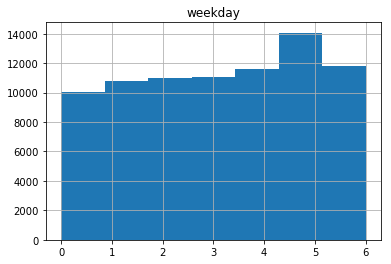

In [47]:
ufo.hist('weekday', bins=7)
plt.show()

In [58]:
ufo['duration (seconds)'] = ufo['duration (seconds)'].astype(str).map(lambda x: re.sub(r'\W+', '', x))
ufo['duration (seconds)'] = ufo['duration (seconds)'].astype(float)
weekdays = ufo[ufo['weekday']<5]
weekends = ufo[ufo['weekday']>=5]

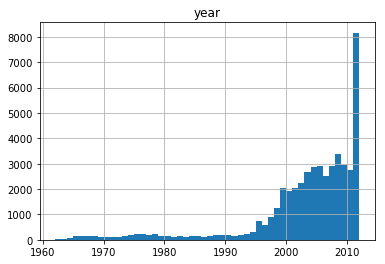

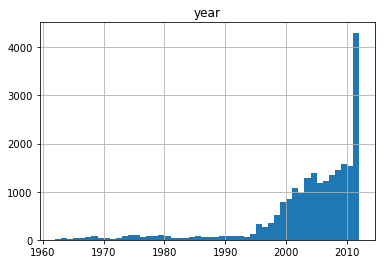

In [83]:
weekdays.hist('year', range = [1962,2012], bins = 50)
weekends.hist('year', range = [1962,2012], bins = 50)
plt.show()

In [77]:
ufo['workday']='No'
ufo.loc[ufo['weekday']<5, ['workday']]='Yes'

In [79]:
ufo

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year,date,weekday,workday
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949,1949-10-10,0,Yes
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949,1949-10-10,0,Yes
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955,1955-10-10,0,Yes
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956,1956-10-10,2,Yes
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960,1960-10-10,0,Yes
5,10/10/1961 19:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,1961,1961-10-10,1,Yes
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180.0,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000,1965,1965-10-10,6,No
7,10/10/1965 23:45,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,1965,1965-10-10,6,No
8,10/10/1966 20:00,pell city,al,us,disk,180.0,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111,1966,1966-10-10,0,Yes
9,10/10/1966 21:00,live oak,fl,us,disk,120.0,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167,1966,1966-10-10,0,Yes
